### Support Vector Machines


In [251]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix




#### Example 1:  Page 148 original edition
Fit a Linear SVM model to IRIS dataset to classify the iris_Virginica using only petal length and width

In [102]:
iris =datasets.load_iris()
iris.data[0:5] , iris.target[0:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [103]:
# Choosing the training set
X = iris.data[:,(2,3)]
#y = (iris.target == 2).astype(np.float64)  # converts the Boolian values to Numpy float64 numbers
y = (iris.target == 2) * 1  # converts the Boolian values to Numpy INT32 numbers

In [104]:
svm_clf = Pipeline((
    ("scaler", StandardScaler()), ("linear_svc",LinearSVC(C=1, loss= "hinge")),
                  ))

In [105]:
svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [106]:
svm_clf.predict([[5.5,1.7]]) # sample petal length and width as the input

array([1])

#### Now lets create a multi-class classifier with the iris dataset

In [107]:
X1 = iris.data
y1 = iris.target
len(X1),len(y1)

(150, 150)

In [108]:
X1_tr,X1_te,y1_tr,y1_te = train_test_split(X1,y1,test_size= 0.2)

In [109]:
X1_tr.shape,y1_tr.shape , X1_te.shape,y1_te.shape

((120, 4), (120,), (30, 4), (30,))

In [110]:
svm_clf1 = Pipeline((
    ("scaler", StandardScaler()), ("svc",SVC(kernel= "linear")),
                  ))

In [111]:
svm_clf1.fit(X1_tr,y1_tr)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [112]:
y1_pred = svm_clf1.predict(X1_te)
len(y1_pred)

30

In [113]:
acc_C1 = accuracy_score(y1_te,y1_pred)
acc_C1

0.9666666666666667

Now we want to use the Gradient Descent with the Hinge loss and learning rate of Alpha = 1/(m*C) to train a SVM classifier

Let's check if our classes are balance

In [114]:
len(y == 0) , len(y == 1) , len(y == 2) # So, yes our classes are pretty balanced. It means that accuracy is a good metric.

(150, 150, 150)

If for the sake of argument our classes were not balanced. Then precision-recall would be a better metric. It could be implemented as follows:

In [117]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_te, y1_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


ValueError: multiclass-multioutput format is not supported

In [131]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(svm_clf, X1_te, y1_te)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


ValueError: operands could not be broadcast together with shapes (30,4) (2,) (30,4) 

## Exercise 9 of the book- Page 165

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [452]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

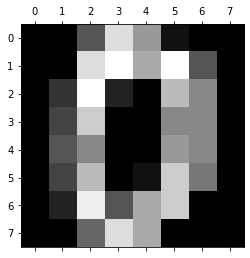

In [453]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [454]:
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

In [455]:
def create_subsets(data_array, target_array, label_value, test_size=0.2):
    from sklearn.model_selection import train_test_split
    new_target = target_array.copy()
    new_target[new_target != label_value] = 10
    X_tr,X_te,y_tr,y_te = train_test_split(data_array,new_target,test_size = test_size)
    
    return X_tr,y_tr,X_te,y_te    

If all 10 below cells are put in one cell, the function to change the labels works only on the first one.

In [456]:
X0_tr,y0_tr,X0_te,y0_te = create_subsets(X,y,0)

In [457]:
X1_tr,y1_tr,X1_te,y1_te = create_subsets(X,y,1)

In [458]:
X2_tr,y2_tr,X2_te,y2_te = create_subsets(X,y,2)

In [459]:
X3_tr,y3_tr,X3_te,y3_te = create_subsets(X,y,3)

In [460]:
X4_tr,y4_tr,X4_te,y4_te = create_subsets(X,y,4)

In [461]:
X5_tr,y5_tr,X5_te,y5_te = create_subsets(X,y,5)

In [462]:
X6_tr,y6_tr,X6_te,y6_te = create_subsets(X,y,6)

In [463]:
X7_tr,y7_tr,X7_te,y7_te = create_subsets(X,y,7)

In [464]:
X8_tr,y8_tr,X8_te,y8_te = create_subsets(X,y,8)

In [465]:
X9_tr,y9_tr,X9_te,y9_te = create_subsets(X,y,9)

In [466]:
# X0_tr=X1_tr=X2_tr=X3_tr=X4_tr=X5_tr=X6_tr=X7_tr=X8_tr=X9_tr = []
# y0_tr=y1_tr=y2_tr=y3_tr=y4_tr=y5_tr=y6_tr=y7_tr=y8_tr=y9_tr = []
# X0_te=X1_te=X2_te=X3_te=X4_te=X5_te=X6_te=X7_te=X8_te=X9_te = []
# y0_te=y1_te=y2_te=y3_te=y4_te=y5_te=y6_te=y7_te=y8_te=y9_te = []


X_tr = [X0_tr,X1_tr,X2_tr,X3_tr,X4_tr,X5_tr,X6_tr,X7_tr,X8_tr,X9_tr]
X_te = [X0_te,X1_te,X2_te,X3_te,X4_te,X5_te,X6_te,X7_te,X8_te,X9_te]
y_tr = [y0_tr,y1_tr,y2_tr,y3_tr,y4_tr,y5_tr,y6_tr,y7_tr,y8_tr,y9_tr]
y_te = [y0_te,y1_te,y2_te,y3_te,y4_te,y5_te,y6_te,y7_te,y8_te,y9_te]


In [467]:
for n,i,j,k,l in zip(range(10),X_tr,y_tr,X_te,y_te):
#     i,j,k,l = create_subsets(X,y,n)
    print(f"Shape X{n}_tr: {i.shape},Shape y{n}_tr: {j.shape}, Shape X{n}_te: {k.shape},Shape y{n}_tr: {l.shape} ")

Shape X0_tr: (1437, 64),Shape y0_tr: (1437,), Shape X0_te: (360, 64),Shape y0_tr: (360,) 
Shape X1_tr: (1437, 64),Shape y1_tr: (1437,), Shape X1_te: (360, 64),Shape y1_tr: (360,) 
Shape X2_tr: (1437, 64),Shape y2_tr: (1437,), Shape X2_te: (360, 64),Shape y2_tr: (360,) 
Shape X3_tr: (1437, 64),Shape y3_tr: (1437,), Shape X3_te: (360, 64),Shape y3_tr: (360,) 
Shape X4_tr: (1437, 64),Shape y4_tr: (1437,), Shape X4_te: (360, 64),Shape y4_tr: (360,) 
Shape X5_tr: (1437, 64),Shape y5_tr: (1437,), Shape X5_te: (360, 64),Shape y5_tr: (360,) 
Shape X6_tr: (1437, 64),Shape y6_tr: (1437,), Shape X6_te: (360, 64),Shape y6_tr: (360,) 
Shape X7_tr: (1437, 64),Shape y7_tr: (1437,), Shape X7_te: (360, 64),Shape y7_tr: (360,) 
Shape X8_tr: (1437, 64),Shape y8_tr: (1437,), Shape X8_te: (360, 64),Shape y8_tr: (360,) 
Shape X9_tr: (1437, 64),Shape y9_tr: (1437,), Shape X9_te: (360, 64),Shape y9_tr: (360,) 


In [468]:
for n,i,j in zip(range(10),y_tr,y_te):
#     i,j,k,l = create_subsets(X,y,n)
    print(f"# of 1s  in y{n}_tr: {i[i == 1].shape} , # of 0s  in y{n}_tr: {i[i == 0].shape}\
, # of 10s  in y{n}_te: {j[j == 1].shape}, # of 0s  in y{n}_te: {j[j == 0].shape} ")
 

# of 1s  in y0_tr: (0,) , # of 0s  in y0_tr: (149,), # of 10s  in y0_te: (0,), # of 0s  in y0_te: (29,) 
# of 1s  in y1_tr: (140,) , # of 0s  in y1_tr: (0,), # of 10s  in y1_te: (42,), # of 0s  in y1_te: (0,) 
# of 1s  in y2_tr: (0,) , # of 0s  in y2_tr: (0,), # of 10s  in y2_te: (0,), # of 0s  in y2_te: (0,) 
# of 1s  in y3_tr: (0,) , # of 0s  in y3_tr: (0,), # of 10s  in y3_te: (0,), # of 0s  in y3_te: (0,) 
# of 1s  in y4_tr: (0,) , # of 0s  in y4_tr: (0,), # of 10s  in y4_te: (0,), # of 0s  in y4_te: (0,) 
# of 1s  in y5_tr: (0,) , # of 0s  in y5_tr: (0,), # of 10s  in y5_te: (0,), # of 0s  in y5_te: (0,) 
# of 1s  in y6_tr: (0,) , # of 0s  in y6_tr: (0,), # of 10s  in y6_te: (0,), # of 0s  in y6_te: (0,) 
# of 1s  in y7_tr: (0,) , # of 0s  in y7_tr: (0,), # of 10s  in y7_te: (0,), # of 0s  in y7_te: (0,) 
# of 1s  in y8_tr: (0,) , # of 0s  in y8_tr: (0,), # of 10s  in y8_te: (0,), # of 0s  in y8_te: (0,) 
# of 1s  in y9_tr: (0,) , # of 0s  in y9_tr: (0,), # of 10s  in y9_te: (0,),

In [469]:
svm_digit_clf = Pipeline((
    ("scaler", StandardScaler()), ("svc classifier",SVC(kernel= "linear")),
                  ))

In [470]:
svm_models = []
for i,j in zip(X_tr,y_tr):
    svm_models.append(svm_digit_clf.fit(i,j))

svm_models[0]

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

[82.22, 80.0, 80.0, 80.0, 78.33, 79.44, 81.67, 81.11, 80.28, 98.33]


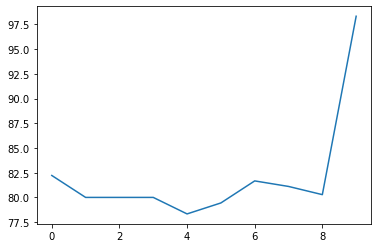

In [471]:
acc = []
for n,i,j in zip(range(10),X_te, y_te):
    acc.append(round(sum(j == svm_models[n].predict(i))/len(j)*100,2))
print(acc)    
plt.plot(list(range(10)),acc)
    

In [472]:
idx= np.random.randint(0,len(X),1)
X_te_final,y_te_final = X[idx] , y[idx]
idx   


array([80])

In [473]:
X_te_final,y_te_final

(array([[ 0.,  0.,  0.,  1., 14., 13.,  1.,  0.,  0.,  0.,  0.,  1., 16.,
         16.,  3.,  0.,  0.,  5., 11., 15., 16., 16.,  0.,  0.,  0.,  4.,
         15., 16., 16., 15.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,
          0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8.,
         16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 13., 15.,  2.,  0.]]),
 array([1]))

In [474]:
prediction = []
for n in range(10):
    prediction.append(svm_models[n].predict(X_te_final))
print(prediction) 

[array([10]), array([10]), array([10]), array([10]), array([10]), array([10]), array([10]), array([10]), array([10]), array([10])]


array([1])

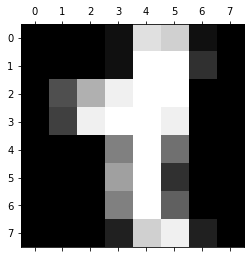

In [475]:
plt.matshow(digits.images[idx[0]])
y[idx]

### Lesson Learned
I knew that SVM is a binary classification algorithm. So, I thought to use it for multi-class classification I need to create 10 binary classfiers, one for each digit. so, I changed the labels in a way that for each classifier the main label ( the digit it is supposed to identify) is 1 and the rest are 0. 
The problem emerged when I checked my predictions and I saw none of them are right. I still couldn't find an answer for why this happened because my approach seems correct.
What I have learned from the Geron solution is that SVM automatically creates different binary classifiers under the hood and all I need to do is to feed it the training data. We can even specify which bianry classification method it uses (OVR or OVO).


### Testing  SVM with different kernels

In [476]:
X_rf_tr, X_rf_te,y_rf_tr, y_rf_te  = train_test_split(X,y,test_size = 0.2)

Just to check if accuracy is a good measure by checking number of instances in each class.
Looking at the output of the next cell we can see that the classes are pretty much balanced in the dataset.
So, Accuracy could be a good measure for the classification. Also, plotting a histogram would help us see how uniform the distribution is for our labels.



In [477]:
for i in range(10):
    print(f"# of {i}s in y_tr: {sum(y_rf_tr == i)} , # of {i}s in y_te: {sum(y_rf_te == i)}" )
    

# of 0s in y_tr: 149 , # of 0s in y_te: 29
# of 1s in y_tr: 136 , # of 1s in y_te: 46
# of 2s in y_tr: 141 , # of 2s in y_te: 36
# of 3s in y_tr: 148 , # of 3s in y_te: 35
# of 4s in y_tr: 147 , # of 4s in y_te: 34
# of 5s in y_tr: 137 , # of 5s in y_te: 45
# of 6s in y_tr: 152 , # of 6s in y_te: 29
# of 7s in y_tr: 142 , # of 7s in y_te: 37
# of 8s in y_tr: 141 , # of 8s in y_te: 33
# of 9s in y_tr: 144 , # of 9s in y_te: 36


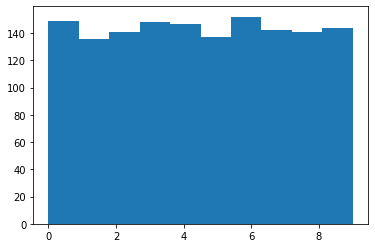

In [478]:
plt.hist(y_rf_tr);

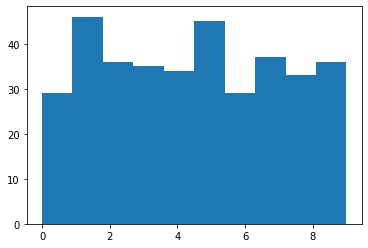

In [479]:
plt.hist(y_rf_te);

##### Linear SVC class with default One_Versus_Rest (OVR)

In [480]:
Linsvm_clf = Pipeline((
    ("scaler", StandardScaler()), (" Linear svc classifier",LinearSVC(dual = False)),
                  ))

Linsvm_clf.fit(X_rf_tr,y_rf_tr)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                (' Linear svc classifier',
                 LinearSVC(C=1.0, class_weight=None, dual=False,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [481]:
y_Linsvm_pred = Linsvm_clf.predict(X_rf_te)
acc_Linsvm = sum(y_Linsvm_pred == y_rf_te)/len(y_rf_te)
acc_Linsvm

0.9472222222222222

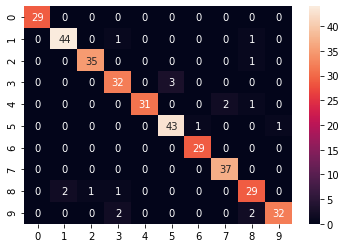

In [482]:
cf_matrix_Linsvm = confusion_matrix(y_rf_te,y_Linsvm_pred)
sns.heatmap(cf_matrix_Linsvm, annot=True)

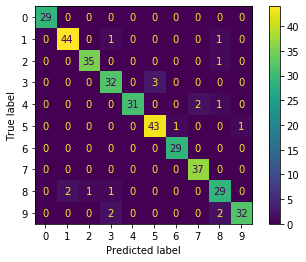

In [483]:
# a better way of plotting the conf. matrix with axes labels
plot_confusion_matrix(Linsvm_clf,X_rf_te,y_rf_te)

##### SVC class with default One_Versus_Rest (OVR) and a Linear Kernel

In [484]:
linkersvm_clf = Pipeline((
    ("scaler", StandardScaler()), (" svc classifier linear kernel",SVC(kernel = "linear")),
                  ))

linkersvm_clf.fit(X_rf_tr,y_rf_tr)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                (' svc classifier linear kernel',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [485]:
y_linkersvm_pred = linkersvm_clf.predict(X_rf_te)
acc_linkersvm = sum(y_linkersvm_pred == y_rf_te)/len(y_rf_te)
acc_linkersvm

0.9805555555555555

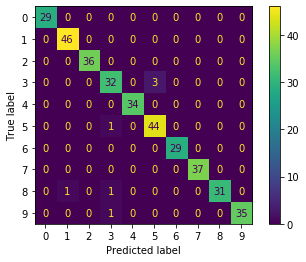

In [486]:
plot_confusion_matrix(linkersvm_clf,X_rf_te,y_rf_te)

##### SVC class with default One_Versus_Rest (OVR) and RBF Kernel

In [553]:
rbfkersvm_clf = Pipeline((
    ("scaler", StandardScaler()), (" svc classifier rbf kernel",SVC(gamma = "auto")),
                  ))

rbfkersvm_clf.fit(X_rf_tr,y_rf_tr)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                (' svc classifier rbf kernel',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [488]:
y_rbfkersvm_pred = rbfkersvm_clf.predict(X_rf_te)
acc_rbfkersvm = sum(y_rbfkersvm_pred == y_rf_te)/len(y_rf_te)
acc_rbfkersvm

0.9833333333333333

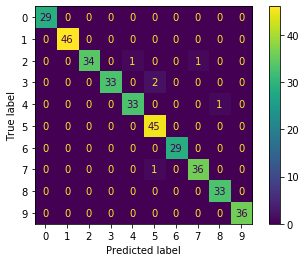

In [489]:
plot_confusion_matrix(rbfkersvm_clf,X_rf_te,y_rf_te)

##### RandomForest Classifier ( just to compare)

In [490]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier()
RF_clf.fit(X_rf_tr,y_rf_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [491]:
y_rf_pred = RF_clf.predict(X_rf_te)
acc_rf = sum(y_rf_pred == y_rf_te)/len(y_rf_te)
acc_rf

0.9722222222222222

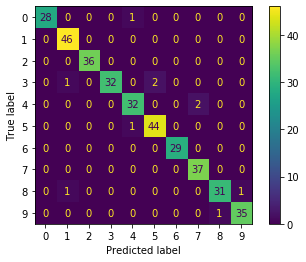

In [492]:
plot_confusion_matrix(RF_clf,X_rf_te,y_rf_te)

### Result comparison 

The accuracy comparison shows that SVC class could be more accurate than the LinearSVC class. Also, using kernel trick can noticably increase the accuracy. 
Compare to other powerful algorithms such as RF, SVC with kernel trick can do better. 
LinearSVC class is a linear time algorithm which can scale pretty well as the training instances increase. SVC class on the other hand, could not scale as good as LinearSVC class should the size of training instances increases. Increasing the number of features, though, doesn't impact either of them. 

In [493]:
import pandas as pd
res_comp = pd.DataFrame([["Linear SVC",acc_Linsvm],["SVC W/ Linear Kernel",acc_linkersvm],
                         ["SVC W/ RBF Kernel",acc_rbfkersvm], ["Random Forest", acc_rf ]],
                        columns = ["Algorithm" , "Accuracy"])
res_comp

,Algorithm,Accuracy
0,Linear SVC,0.947222
1,SVC W/ Linear Kernel,0.980556
2,SVC W/ RBF Kernel,0.983333
3,Random Forest,0.972222


#### Analyzing the result of LinearSVC

Now we pick the algorithm with the lowest accuracy and investigate the confusion matrix to see which digits have more contribution to the misslabeled predictions and plot those digits to see if the human brain can classify them or not.


In [494]:
def plot_digits(X,y,n,num_cols):
    """ This Function is to plot the digit images for each digit """
    # n is the digit that all images of which should be plotted
    num_rows = (len(y[y == n]) // num_cols) + 1 
    fig = plt.figure()  # figure size can be added as an arguement like figsize=(15,15)  
    fig.suptitle("All images of digit " +  str(n) + " in the test set ")
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    for i in range(1,len(y[y == n])+1): # i to start from 1 not 0
        ax = fig.add_subplot(num_rows, num_cols, i) # i shows the position of the subplot and can't be 0. it starts from 1
        ax.matshow(X[y == n][i-1].reshape(8,8)) # reshape the flattened X to make it a 2D array
        ax.set_xticks([])  # remove X axis ticks
        ax.set_yticks([])  # remove X axis ticks 

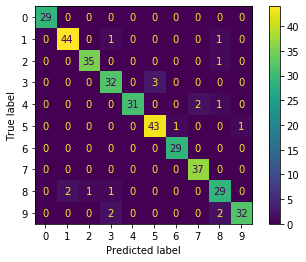

In [495]:
plot_confusion_matrix(Linsvm_clf,X_rf_te,y_rf_te)

For instance if we plot all the 3s (see next cell), we can see that two of the images look like 5 so that even human brain can't classify them correctly.


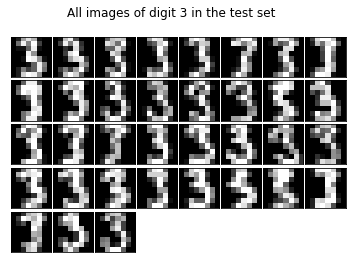

In [496]:
plot_digits(X_rf_te,y_rf_te,3,8)

### Plotting the learning curves ( training and validation loss against size of the training set) 
again we can use the LinerSVC which has the lowest accuracy

In [551]:
def learning_curve(model,X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt
    from pylab import rcParams
    rcParams['figure.figsize'] = 10, 5
    X_tr,X_val,y_tr, y_val = train_test_split(X,y, test_size = 0.2)
    training_loss = val_loss = []
    for m in np.arange(10,len(X_tr)):
        model.fit(X_tr[:m],y_tr[:m])
        y_tr_pred = model.predict(X_tr[:m])
        y_val_pred = model.predict(X_val)
        training_loss.append(1-accuracy_score(y_tr[:m],y_tr_pred))
        val_loss.append(1-accuracy_score(y_val,y_val_pred))
    plt.plot(training_loss, "r-" , linewidth = 2 , label = "Training Loss")
    plt.plot(val_loss, "b-" , linewidth = 1 , label = "Validation Loss")     
    

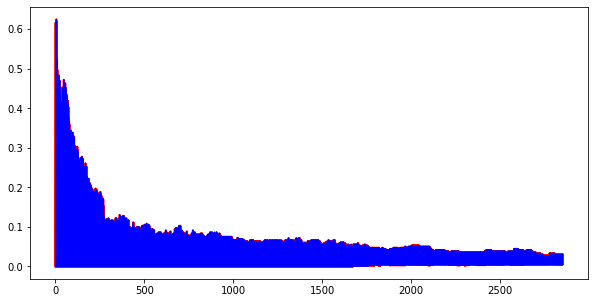

In [546]:
# Linear SVC learning curve
learning_curve(Linsvm_clf,X,y)

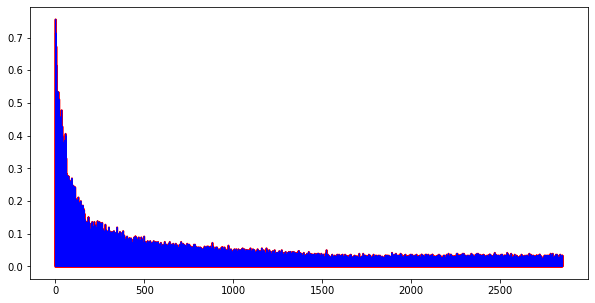

In [555]:
# Random Forest learning curve
learning_curve(RF_clf,X,y)

#### Learning curve explanation
In the beginning because we only have 10 instances, there is not enough data for each class (for some classes may be even none). So, the training and validation losses start high but as the number of instances increases the training loss goes down and consequently the validation loss. 